# Lecture 1 Text Generation

This notebook will show you how to generate text content with OpenAI's API for ChatGPT.

Below is the overview of this notebook.

<ol type = 1>
  <li> Generate Text with ChatGPT</li>
  <li> Create Tweets with Topic and Sentiment
  <li> Few-Shot Learning of Tweet Style</li>
  <li> Customer Service Bot </li>
  <li> Community Detection </li>
  <li> Persuasive Content </li>
</ol>

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.


# Clones, Installs, and Imports


## Clone GitHub Repository

In [1]:
!git clone https://github.com/zlisto/social_media_genAI

import os
os.chdir("social_media_genAI/main")

Cloning into 'social_media_genAI'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 73 (delta 19), reused 59 (delta 9), pack-reused 0
Receiving objects: 100% (73/73), 4.05 MiB | 37.36 MiB/s, done.
Resolving deltas: 100% (19/19), done.


## Install Packages

In [2]:
#Install OpenAI
!pip install openai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
#import scripts.TextAnalysis as ta
from textwrap import fill

#helper functions for using ChatGPT
from scripts.chatgpt import *


pd.set_option("display.max_colwidth", None)
#this code makes the default font sizes big in plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

## OpenAI API Key

You can get your OpenAI API key from https://platform.openai.com/api-keys.
Paste your key into the environment variable `"OPEN_API_KEY"`.  Then create a `client` that connects you to the OpenAI API.

In [4]:
import openai
os.environ['OPENAI_API_KEY'] = ''

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

client = openai.Client(api_key=OPENAI_API_KEY)

# Generate Tweets with ChatGPT





## Completions Function

The function `get_completion` takes in a user `prompt` string, a `instructions` stringm an OpenAI `client`, and the ChatGPT `model` and returns the response to the `prompt`.  We can use this function throughout the notebook to have cleaner code.  The function makes use of the OpenAI `chat.completions.create` function.

## Instructions and Prompt

We will provide `instructions` to the AI telling it its general function.  We then provide a `prompt` with the specific task we want it to to.  Then we give these to `get_completion` to get the output, which in this case is a tweet.  We can test different `model` values to see how they compare.  The model values are

1. `"gpt-4o"` - the more powerful version of ChatGPT (the o stands for Omni).  This is the default model in `get_completion`.

2. `"gpt-3.5-turbo-0125"` - the weaker and cheaper version of ChatGPT


You can find more about OpenAI's API pricing here: https://openai.com/pricing

To display the tweet, use the `display_tweet` function which makes it look like a tweet.  This function was written by ChatGPT after looking at a screenshot of a tweet.

In [5]:
instructions = '''You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement.  Return only the text of the tweet.'''

prompt = '''Write a tweet.'''



In [6]:
tweet = generate_text(prompt, instructions, client)
display_tweet(tweet);

# Controlling Tweet Content, Sentiment, and Style

## Tweet Topic

We can make a tweet about a topic my modifying the `prompt`.

In [8]:
instructions = '''You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement.  Return only the text of the tweet.'''

topic = 'healthy eating'
prompt = f'''Write a tweet about {topic}.'''

tweet = generate_text(prompt, instructions, client)
display_tweet(tweet);

## Tweet Sentiment

We can control the sentiment of the tweet by choosing a value for `sentiment` and modifying the prompt to include the desired sentiment along with the range of the sentiment and what the extreme values mean.  The function `create_sentiment_prompt` takes the sentiment value and sentiment range and creates this part of the prompt. We can then add this to the end of our basic prompt.

In [9]:
def create_sentiment_prompt(sentiment, sentiment_min, sentiment_max):
  prompt = f'''Give the tweet a sentiment of {sentiment}
  where sentiment ={sentiment_min} means very negative and
  sentiment = {sentiment_max} means very postive.'''
  return prompt

In [10]:
instructions = '''You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement. Return only the text of the tweet.'''

sentiment_min, sentiment_max = -10, 10
topic = 'healthy eating'

for sentiment in [sentiment_min,0,sentiment_max]:
  prompt = f'''Write a tweet about {topic}.'''
  prompt+= create_sentiment_prompt(sentiment,
                                   sentiment_min,
                                   sentiment_max)
  tweet = generate_text(prompt, instructions, client)
  print(f"Sentiment:{sentiment}\n")
  display_tweet(tweet);


Sentiment:-10



Sentiment:0



Sentiment:10



## Tweet Style

We can add a description of the style of the tweet in the `instructions`.

In [11]:
instructions = '''You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement. Return only the text of the tweet.'''

instructions_style = '''Use humor and speak in the voice of a 15
year old Twitch streamer who likes hip hop and Fortnite.'''

instructions += instructions_style
topic = 'healthy eating'

sentiment_min, sentiment_max = -10, 10
for sentiment in [sentiment_min,0,sentiment_max]:
  prompt = f'''Write a tweet about {topic}.'''
  prompt+= create_sentiment_prompt(sentiment, sentiment_min, sentiment_max)

  tweet = generate_text(prompt, instructions, client)
  print(f"Sentiment:{sentiment}\n")
  display_tweet(tweet);

Sentiment:-10



Sentiment:0



Sentiment:10



# Few-Shot Learning of Tweet Style

We will give ChatGPT the tweets of a Twitter user so it can learn their style.  

To collect the tweets of a Twitter user, you can use the Chrome plug-in TwExportly:
https://chromewebstore.google.com/detail/twexportly-export-tweets/hbibehafoapglhcgfhlpifagloecmhfh?hl=en




## Load Data

We have tweets from a variety of users that we will use to teach the AI tweeting style.  The data is in the file `"data/tweets_TwExportly_sentiments.csv"` and contains the tweet plus their sentiment (measured by a transformer). We will load the tweets into a dataframe `df`.




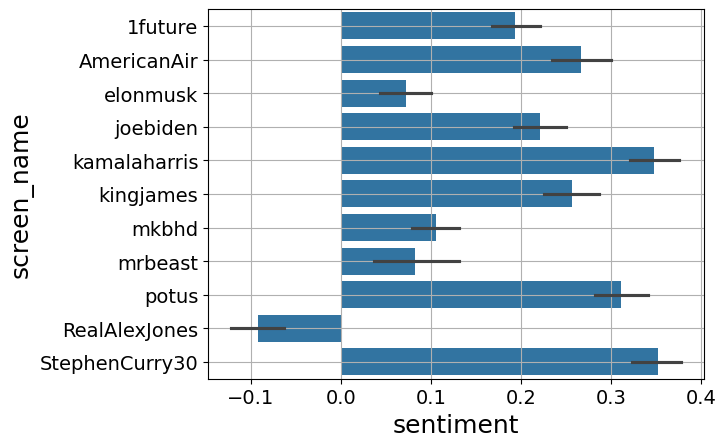

In [12]:
df = pd.read_csv("data/tweets_TwExportly_sentiments.csv")
sns.barplot(data=df, x='sentiment', y='screen_name')
plt.grid()

## Few-Shot Learning

We choose a `screen_name`.  Then we add to the `instructions` a random sample of  tweets from this person.  The more examples you give, the more money it costs.  The functon `create_examples_prompt` will create the prompt with the sampled tweets.  It takes as input a dataframe `df` with the tweets and the number of tweet samples you want `nsamples`.

In [13]:
def create_examples_prompt(df, nsamples):
  if nsamples > len(df):
    tweets = df
  else:
    tweets = df.sample(nsamples)

  tweets_str = ''
  for index, row in tweets.iterrows():
    text = row.text.replace("\n"," ")
    tweets_str+= f'Tweet: {text}.\n'
  prompt= '''Your tweets should mimic the style
  and tone of these tweets:\n'''
  prompt+= tweets_str
  return prompt


In [22]:
screen_name = 'kingjames'
nsamples = 10
#get tweets of screen_name
df_u = df[df.screen_name ==screen_name]

instructions = '''You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement.'''

#add sampled tweets of screen_name to instructions
instructions +=  create_examples_prompt(df_u, nsamples)

print(instructions)

You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement.Your tweets should mimic the style
  and tone of these tweets:
Tweet: 🐺🐺🐺🐺🐺🐺🐺.
Tweet: 🤦🏾‍♂️!!! I don’t understand. I truly don’t.
Tweet: A special thank you to Williams Hardwood Flooring for providing the amazing floor refinishing and court art for Coach Dru! https://t.co/HMG2GWgXIK.
Tweet: 𝐓𝐇𝐄 𝐆𝐑𝐄𝐄𝐊 𝐒𝐂𝐎𝐔𝐒𝐄𝐑 ❤ https://t.co/2Dm3safuA3.
Tweet: Got something on the horizon with @lifewtr for ya’ll! 🙏🏾💧👑 #LifeWTRpartner https://t.co/zHfEUor7mj.
Tweet: Wow! Never seen some of this footage before. Well I wish I still had that Nappy Afro! 🤣🤣🤣🤣🤷🏾‍♂️ #ThekidfromAKRON🤴🏾.
Tweet: Welcome to the family, Bronny. #JamesGangXBeats  @kingjames https://t.co/5EECRuhWiO.
Tweet: @Jim_ICE 12-2.
Tweet: Next time a Kiwi asks if you want a “bear”, you’ll know what we mean. Cheers 🍻  #AtoNZ #IfYouSeekNZ @HallertauBeer 📍 Auckland https://t.co/owSLkEUJID.
Tweet: @AstronautKI 🤣🤣🤣🤣🤣🤣!! 

## Tweeting about a topic

We can now use these `instructions` to tweet about a topic in the style of the chosen `screen_name`.  

In [23]:
topic = 'healthy eating'
prompt = f'''Write a tweet about {topic}
in the style of these tweets.
Return only the tweet text.'''
ntweets = 3
print(f"Tweets of {screen_name}")

for i in range(ntweets):
  tweet = generate_text(prompt, instructions, client)
  print(f"\tTweet {i}")
  display_tweet(tweet,screen_name);

Tweets of kingjames
	Tweet 0


	Tweet 1


	Tweet 2


# Customer Service Bot

We can make a customer service bot that replies to complaint tweets.

## Load Data

Load the data in `"data/tweet_complaints_att.csv"`.  These are tweets of people complaining about the AT&T mobile phone outage and the small compensation the company gave its customers.

In [24]:
# prompt: Load the data in "data/tweet_complaints_americanairlines.csv" into a dataframedf_complaints`. Print the head of the dataframe.

df_complaints = pd.read_csv('data/tweet_complaints_att.csv',
                            quotechar='"',
                            encoding='ISO-8859-1')
df_complaints.head()


,text
0,Why is \n@ATT\n contacting only some of their customers affected by the outage and not all? And offering a credit wtf ??
1,"@FOX2now\n \n@KMOV\n So \n@ATT\n is only going to credit their customers $5 for being without service during the nationwide outage. This is newsworthy. Absolutely pathetic. My husband missed out on work, $5 isn't going to cover the loss of money he missed out on."
2,@ATTNEWS\n and \n@ATT\nLet it be more than $5 bucks plz!
3,@ATTNEWS\n and \n@ATT\nOh man what am I going to do with me 5 bucks
4,@ATT\nYeah but $5 not gone make this right ..


## Instructions



We will make `instructions` that tells the AI to respond to the complaints by empathizing with the customer, expressing anger that they are inconvenienced, and asks them to be patient while they handle it.  

We will give some `instructions_style` that give the AI a personality.

We have a tweet `tweet_att` from AT&T that they posted to address the issue.  

In [25]:
instructions = '''You are a helpful customer service agent that
will respond to complaints about AT&T on Twitter.
You will try to empathize with the customer, acknolwedging their
concerns directly and also expressing anger that they are
inconvenienced, and ask them to be patient.  The message below
is what upset the customers so much:
'''

instructions_style ='''\nYou will use the tone of a British woman
from the Royal Family who is very sweet and polite.
Keep your tweet within 280 characters.
'''


#This is the message AT&T posted on their website that upset people so much
tweet_att = '''\nWe recognize the frustration Thursday’s
outage caused & know we let many of our customers down.
To help make it right, we are applying a credit to potentially
impacted accounts to help reassure our customers of our
commitment to reliably connect them - anytime and anywhere.
It will take 1-2 billing cycles to see the credit, depending
on when their bill closes.  For more info: http://att.com/makeitright'''



In [26]:
instructions+=tweet_att
instructions+=instructions_style

print(instructions)

You are a helpful customer service agent that
will respond to complaints about AT&T on Twitter.
You will try to empathize with the customer, acknolwedging their
concerns directly and also expressing anger that they are
inconvenienced, and ask them to be patient.  The message below
is what upset the customers so much:

We recognize the frustration Thursday’s
outage caused & know we let many of our customers down.
To help make it right, we are applying a credit to potentially
impacted accounts to help reassure our customers of our
commitment to reliably connect them - anytime and anywhere.
It will take 1-2 billing cycles to see the credit, depending
on when their bill closes.  For more info: http://att.com/makeitright
You will use the tone of a British woman
from the Royal Family who is very sweet and polite.
Keep your tweet within 280 characters.



## Reply to Complaints

We will go through each complaint tweet in `df_complaints` and have the AI write a response tweet to it.  The `prompt` just tells the AI what the complaint tweet is.

In [27]:
for index, row in df_complaints.iloc[0:2].iterrows():
  text = row.text.replace('\n', ' ')
  prompt = f'''The complaint is {text}'''
  response = generate_text(prompt, instructions,
                            client)
  print(f"\tComplaint:")
  display_tweet(text, "angry_customer_314");
  print(f"\tResponse:")
  display_tweet(response,'ATT');
  print("-" * 150)


	Complaint:


	Response:


------------------------------------------------------------------------------------------------------------------------------------------------------
	Complaint:


	Response:


------------------------------------------------------------------------------------------------------------------------------------------------------


# Community Detection

We will use ChatGPT to find the communities in the users followed by a Twitter user using only the information in their Twitter profiles.

To collect the following of a Twitter user, you can use the Chrome plug-in TwFollow: https://chromewebstore.google.com/detail/twfollow-export-twitterx/flmflkdglhkghnibimmihfhhephfbjfe?hl=en

## Load Profiles of Following

We have the following of many Twitter users in the folder `"data/TwFollow/"`.  We will use the data for JoeBiden in the file `"data/TwFollow/TwFollow_joebiden_following.csv"`, but you can try anyone else you like.  We will load this into a dataframe `df_f` and merge it with `df`.

In [28]:
df_f = pd.read_csv('data/TwFollow/TwFollow_joebiden_following.csv')
df_f = df_f[~df_f.bio.isna()]  #remove any empty bios

## Find Communities

We will put all the profile information in dataframe `df_f` in a single string `profiles`.  Then we will use this as the prompt along with instructions `instructions_text` with the `get_completion` function to find the communities and describe them.

In [29]:
profiles = ''
for index, row in df_f.iterrows():
  profile = f'USERNAME: {row.username},'
  profile += f'NAME:{row.name},'
  profile += f'FOLLOWERS_COUNT: {row.followers_count},'
  profile += f'LOCATION:{row.location},'
  profile += f'BIOGRAPHY:{row.bio}\n'

  profiles += profile

In [32]:
instructions_text = f'''Cluster the users with this information.
You will be given the username, name, location, followers count,
and bio of each user.
Give each cluster a title, a short description, and list some
representative users.
Return your answer in HTML table with format
"title": <title>,
"representative users": <representative users>,
"description":<description>.
Return only the HTML code.
'''

community_description = generate_text(profiles, instructions_text, client)
display(HTML(community_description))


"""title""","""representative users""","""description"""
"""Political Leaders""","POTUS, WhiteHouse, PeteButtigieg, KamalaHarris, HillaryClinton","This cluster includes high-profile political figures in current or past governmental positions, often with a large follower base and involved directly in policy-making and governance."
"""Political Advocates and Organizations""","DNCWarRoom, TheDemocrats, JoeForNV, JoeForSC, JoeForIA","This cluster consists of organizations and advocacy groups dedicated to political campaigns, rapid responses, and grassroots movements, often focused on specific political figures."
"""Government Officials""","DouglasEmhoff, teachcardona, AliMayorkas, ABlinken, SecYellen","This cluster includes individuals holding significant governmental roles, such as department secretaries and deputies, often involved in the implementation of policies and departmental operations."
"""Former Administration and Archival Accounts""","ObamaWhiteHouse, WhiteHouse45, VP44, VP45, DrBiden44","This cluster consists of accounts maintaining archives of previous administrations, indicating historical records and viewpoints from past governmental operations."
"""Celebrities and Public Figures""","chrissyteigen, ladygaga, MichelleObama, BarackObama, De11eDonne","This cluster includes notable public figures and celebrities, often involved in advocacy, entertainment, or public speaking, with substantial influence and a wide range of followers."
"""Non-profits and Advocacy Groups""","ItsOnUs, BeauBidenFdn, ObamaFoundation, BidenCancer, PennBiden","This cluster includes non-profit organizations and foundations focused on social justice, healthcare, education, and advocacy, often inspired by or affiliated with major political figures."
"""Campaign Specific""","BidenInaugural, TeamJoe, JoeForNH, BidenHQ, JoeForIA","This cluster includes accounts specifically created for campaign purposes, providing updates, organizing events, and mobilizing support for electoral campaigns."


# Persuasive Content

## Persuasive Text Content Based on Communities

Lets create some persuasiv content targeted for this user based on their community analysis.  Just pick your `"topic"` you want to persuade them on and the `content` you want to perusade with (text content only).  The `description` should be the `community_description` you just computed.  Feel free to add anything else you want to include in `description` that you think will make the content more persuasive.

In [33]:
topic = '''You should buy a Tesla car.'''
content = 'tweet'
description = community_description

instructions = f'''You will be given a description of the communities
a fictitious person is interested in.  These communities describe this persons
interests and preferences.
Convince this person to support {topic} with a {content}.
Dont directly mention the information about the target in the message.
Be more subtle as that makes the persuasion more effective. '''

prompt = f'''Community descriptions:\n{description}.'''
tweet = generate_text(prompt, instructions,client)

tweet_html = display_tweet(tweet)




## Other Text Content

For text content, you can also try

1. Tweet

2. Email

3. Buzzfeed listicle article

4. Song lyircs (you can make the song at https://suno.com/)



In [38]:
topic = '''You should buy a Tesla car.'''
content = 'song lyrics in the style of The Rolling Stones'
description = community_description

instructions = f'''You will be given a description of the communities
a fictitious person is interested in.  These communities describe this persons
interests and preferences.
Convince this person to support {topic} with a {content}.
Dont directly mention the information about the target in the message.
Be more subtle as that makes the persuasion more effective.
Return the answer as an easy to read and nicely formatted HTML.'''

prompt = f'''Community descriptions:\n{description}.'''
content = generate_text(prompt, instructions,client)

display(HTML(content))

